<a href="https://colab.research.google.com/github/shahriar-tamjid/road-accident-data-analysis-of-dhaka-city/blob/main/Impact%20Of%20Different%20Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/MyDrive/GoogleColab2/Pre-Defense/Classification_Analysis/calculate_probability.py /content

Mounted at /content/drive


# **Import Libraries and Load Dataset**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import calculate_probability as cp

# Load the dataset into a Pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/GoogleColab2/Data Analysis/Accident-Prone Areas/Numeric_Accident_Data.xlsx')

df.head()

,ID,Year,Month,Location,Accident_Intensity,Junction,Traffic_Control,Weather,Lighting
0,1,2007,6,1,4,6,6,3,3
1,2,2007,5,2,4,1,6,3,3
2,3,2007,11,3,4,1,6,1,2
3,4,2007,10,4,3,1,6,1,3
4,5,2007,10,5,4,2,1,3,3


# **Impact of Junctions**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Junction        Probability
No
Intersection	0.4693
Staggered	0.3885
3-Way	0.5242
4-Way	0.4331
Roundabout	0.3614
Railway
Crossing	0.2922


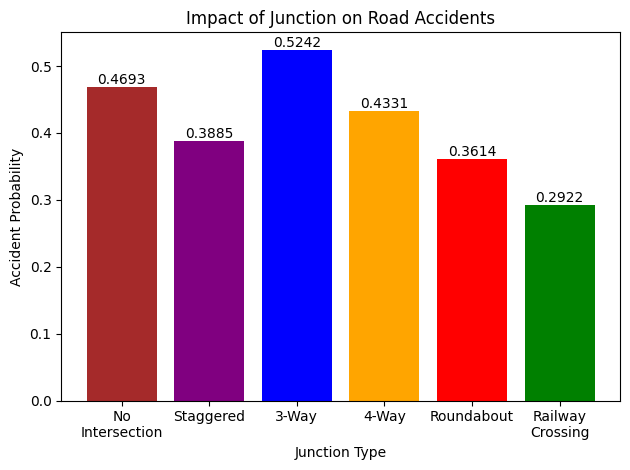

In [ ]:
# Select the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Traffic_Control', 'Weather']
df_selected = df[columns]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Junction', axis=1)
y = df_selected['Junction']

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the traffic control for the test set
predictions = model.predict(X_test)

# Print the most accident-prone junctions
traffic_proba = model.predict_proba(X_test)
traffic_proba_df = pd.DataFrame(traffic_proba, columns=model.classes_)
most_accident_prone_junction = traffic_proba_df.mean().sort_values(ascending=False).index[:6]

# Call the function and store the result
result = cp.junction_probability(most_accident_prone_junction)

# Fetch data for plotting like a matrix
# print(result[0][0])
# print(result[0][1])

# Print the results from the array using a loop
print('Junction        Probability')
for row in result:
    print("\t".join(str(element) for element in row))


#####################################################
############## Vizualization of Output ###############
#####################################################


# Junction types
junction_types = [result[0][0], result[1][0], result[2][0], result[3][0], result[4][0], result[5][0]]

# Accident probabilities
accident_probabilities = [result[0][1], result[1][1], result[2][1], result[3][1], result[4][1], result[5][1]]

# Colors for the bars
colors = ['brown', 'purple', 'blue', 'orange', 'red', 'green']

# Plotting the histogram
plt.bar(junction_types, accident_probabilities, color=colors)

# Adding labels and title
plt.xlabel('Junction Type')
plt.ylabel('Accident Probability')
plt.title('Impact of Junction on Road Accidents')

# Display the accident probabilities on top of each bar
for i, v in enumerate(accident_probabilities):
    plt.text(i, v, f'{v:.4f}', color='black', ha='center', va='bottom')

# Adjust the layout for better readability
plt.tight_layout()

# Display the histogram
plt.show()


# **Impact of Traffic Conditions**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Traffic_Condition  Probability
Police
Controlled	0.4811
Traffic
Signal
Controlled	0.4103
Police &
Signal
Controlled	0.4532
Pedestrain
Crossing	0.3722
Median
Strip	0.3244
Uncontrolled	0.5713


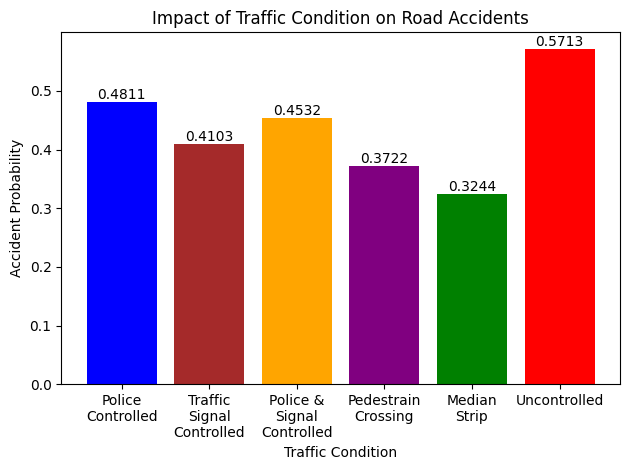

In [ ]:
# Select the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Traffic_Control', 'Weather']
df_selected = df[columns]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Junction', axis=1)
y = df_selected['Junction']

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the traffic control for the test set
predictions = model.predict(X_test)

# Print the most accident-prone junctions
traffic_proba = model.predict_proba(X_test)
traffic_proba_df = pd.DataFrame(traffic_proba, columns=model.classes_)
most_accident_prone_traffic = traffic_proba_df.mean().sort_values(ascending=False).index[:6]

# Call the function and store the result
result = cp.traffic_probability(most_accident_prone_traffic)

# Fetch data for plotting like a matrix
# print(result[0][0])
# print(result[0][1])

# Print the results from the array using a loop
print('Traffic_Condition  Probability')
for row in result:
    print("\t".join(str(element) for element in row))


#####################################################
############## Vizualization of Output ###############
#####################################################


# Traffic conditions
traffic_conditions = [result[0][0], result[1][0], result[2][0], result[3][0], result[4][0], result[5][0]]

# Accident probabilities
accident_probabilities = [result[0][1], result[1][1], result[2][1], result[3][1], result[4][1], result[5][1]]

# Colors for the bars
colors = ['blue', 'brown', 'orange', 'purple', 'green', 'red']

# Plotting the histogram
plt.bar(traffic_conditions, accident_probabilities, color=colors)

# Adding labels and title
plt.xlabel('Traffic Condition')
plt.ylabel('Accident Probability')
plt.title('Impact of Traffic Condition on Road Accidents')

# Display the accident probabilities on top of each bar
for i, v in enumerate(accident_probabilities):
    plt.text(i, v, f'{v:.4f}', color='black', ha='center', va='bottom')

# Adjust the layout for better readability
plt.tight_layout()

# Display the histogram
plt.show()


# **Impact of Weather Conditions**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weather_Condition  Probability
Sunny	0.4161
Overcast	0.1724
Rainy	0.6766
Foggy	0.2846


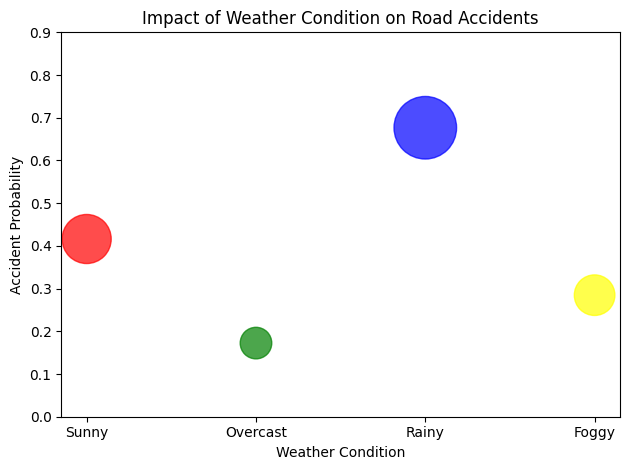

In [ ]:
# Select the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Traffic_Control', 'Weather']
df_selected = df[columns]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Junction', axis=1)
y = df_selected['Junction']

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the traffic control for the test set
predictions = model.predict(X_test)

# Print the most accident-prone junctions
traffic_proba = model.predict_proba(X_test)
traffic_proba_df = pd.DataFrame(traffic_proba, columns=model.classes_)
most_accident_prone_weather = traffic_proba_df.mean().sort_values(ascending=False).index[:6]

# Call the function and store the result
result = cp.weather_probability(most_accident_prone_weather)

# Fetch data for plotting like a matrix
# print(result[0][0])
# print(result[0][1])

# Print the results from the array using a loop
print('Weather_Condition  Probability')
for row in result:
    print("\t".join(str(element) for element in row))


#####################################################
############## Vizualization of Output ###############
#####################################################


# Weather conditions
weather_conditions = [result[0][0], result[1][0], result[2][0], result[3][0]]

# Accident probabilities
accident_probabilities = [result[0][1], result[1][1], result[2][1], result[3][1]]

# Colors for the bubbles
colors = ['red', 'green', 'blue', 'yellow']

# Scaling the marker sizes based on accident probabilities
scaled_marker_sizes = np.array(accident_probabilities) * 3000

# Plotting the bubble chart
plt.scatter(range(len(weather_conditions)), accident_probabilities, s=scaled_marker_sizes, c=colors, alpha=0.7)

# Setting the ticks and labels on x-axis
plt.xticks(range(len(weather_conditions)), weather_conditions)

# Adding labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Accident Probability')
plt.title('Impact of Weather Condition on Road Accidents')

# Adjusting the spacing between the bubbles
plt.tight_layout()

# Setting the upper limit on y-axis
plt.ylim(0, 0.9)

# Display the bubble chart
plt.show()


# **Impact of Lighting Conditions**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lighting_Condition  Probability
Dawn	0.0868
Day	0.5451
Dusk	0.1823
Night	0.3217


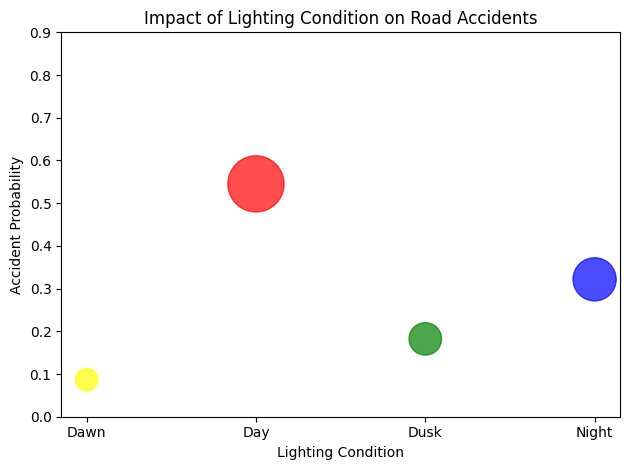

In [ ]:
# Select the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Traffic_Control', 'Weather']
df_selected = df[columns]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Junction', axis=1)
y = df_selected['Junction']

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the traffic control for the test set
predictions = model.predict(X_test)

# Print the most accident-prone junctions
traffic_proba = model.predict_proba(X_test)
traffic_proba_df = pd.DataFrame(traffic_proba, columns=model.classes_)
most_accident_prone_lighting = traffic_proba_df.mean().sort_values(ascending=False).index[:6]

# Call the function and store the result
result = cp.lighting_probability(most_accident_prone_lighting)

# Fetch data for plotting like a matrix
# print(result[0][0])
# print(result[0][1])

# Print the results from the array using a loop
print('Lighting_Condition  Probability')
for row in result:
    print("\t".join(str(element) for element in row))


#####################################################
############## Vizualization of Output ###############
#####################################################


# Lighting conditions
lighting_conditions = [result[0][0], result[1][0], result[2][0], result[3][0]]

# Accident probabilities
accident_probabilities = [result[0][1], result[1][1], result[2][1], result[3][1]]

# Colors for the bubbles
colors = ['yellow', 'red', 'green', 'blue']

# Scaling the marker sizes based on accident probabilities
scaled_marker_sizes = np.array(accident_probabilities) * 3000

# Plotting the bubble chart
plt.scatter(range(len(lighting_conditions)), accident_probabilities, s=scaled_marker_sizes, c=colors, alpha=0.7)

# Setting the ticks and labels on x-axis
plt.xticks(range(len(lighting_conditions)), lighting_conditions)

# Adding labels and title
plt.xlabel('Lighting Condition')
plt.ylabel('Accident Probability')
plt.title('Impact of Lighting Condition on Road Accidents')

# Adjusting the spacing between the bubbles
plt.tight_layout()

# Setting the upper limit on y-axis
plt.ylim(0, 0.9)

# Display the bubble chart
plt.show()

